In [61]:
def f(x):
    return 2 * x ** 2 - x **3 / 3

In [62]:
import numpy as np

x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [63]:
y = f(x)

y

array([10.66666667,  7.91145833,  5.625     ,  3.77604167,  2.33333333,
        1.265625  ,  0.54166667,  0.13020833,  0.        ,  0.11979167,
        0.45833333,  0.984375  ,  1.66666667,  2.47395833,  3.375     ,
        4.33854167,  5.33333333,  6.328125  ,  7.29166667,  8.19270833,
        9.        ,  9.68229167, 10.20833333, 10.546875  , 10.66666667])

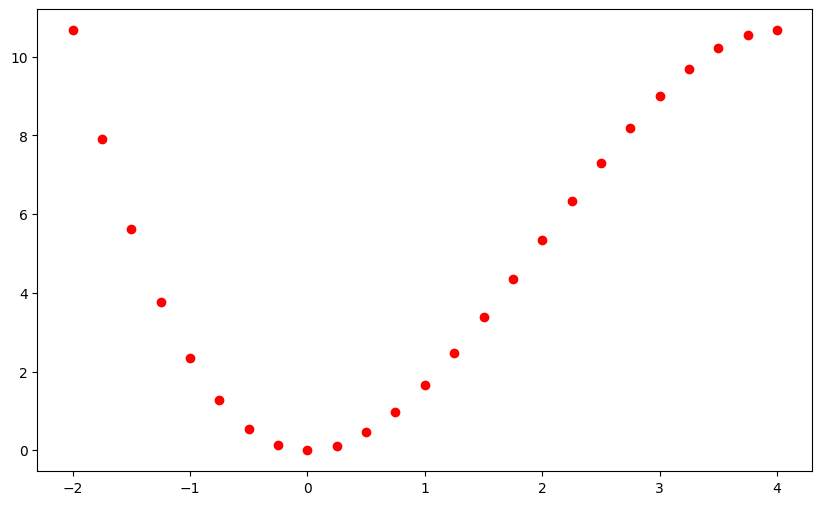

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(x, y, 'ro')

In [65]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

np.float64(1.0541666666666667)

In [66]:
alpha = y.mean() - beta * x.mean()
alpha

np.float64(3.8625000000000003)

In [67]:
y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean()
MSE

np.float64(10.721953125)

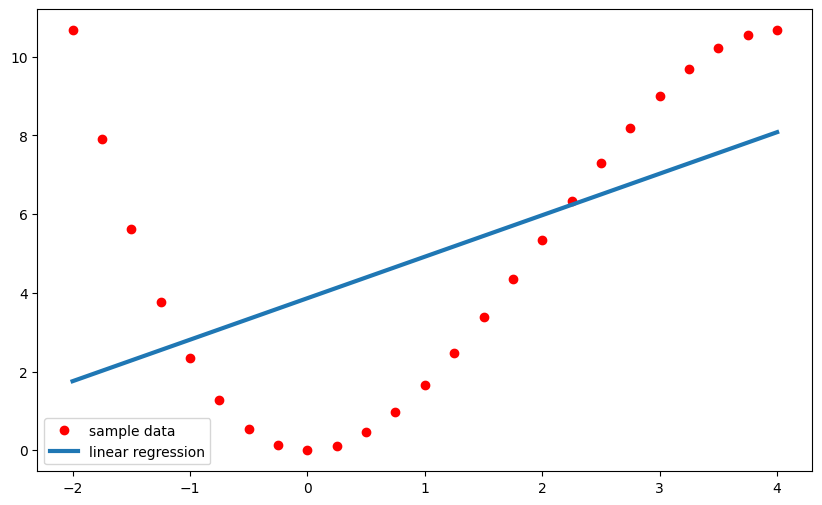

In [68]:
plt.figure(figsize = (10, 6))
plt.plot(x, y, 'ro', label = 'sample data')
plt.plot(x, y_, lw =3.0, label = 'linear regression')
plt.legend()

deg = 1, MSE = 10.72195
deg = 2, MSE = 2.31258
deg = 3, MSE = 0.00000


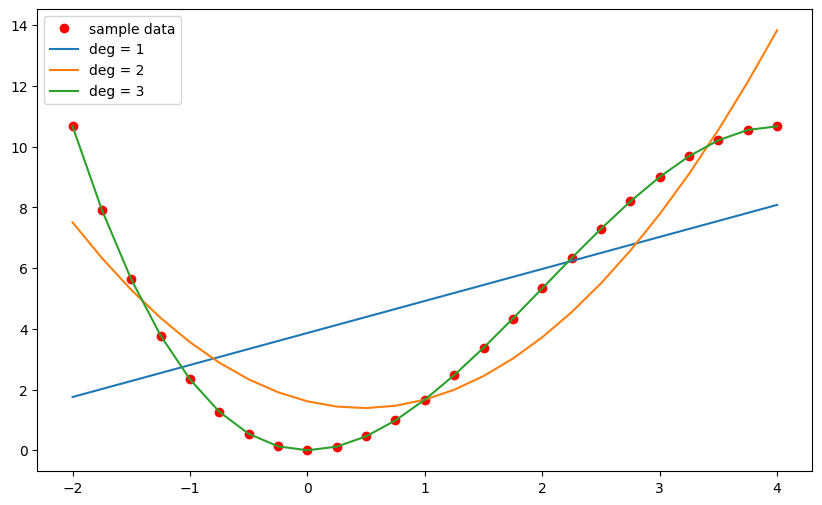

In [69]:
plt.figure(figsize = (10, 6))

plt.plot(x, y, 'ro', label = 'sample data')

for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg = {deg}, MSE = {MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label = f'deg = {deg}')

plt.legend()

In [70]:
reg

array([-3.33333333e-01,  2.00000000e+00,  6.89327706e-16, -9.94759830e-15])

# Neural Network

In [71]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3 * [256], learning_rate_init=0.03, max_iter=5000, random_state=1000)

In [72]:
%time model.fit(x.reshape(-1, 1), y)

CPU times: total: 844 ms
Wall time: 545 ms


,loss,'squared_error'
,hidden_layer_sizes,"[256, 256, ...]"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.03
,power_t,0.5
,max_iter,5000
,shuffle,True


In [75]:
y_ = model.predict(x.reshape(-1, 1))

MSE = ((y - y_) ** 2).mean()
MSE

np.float64(0.006775846547443183)

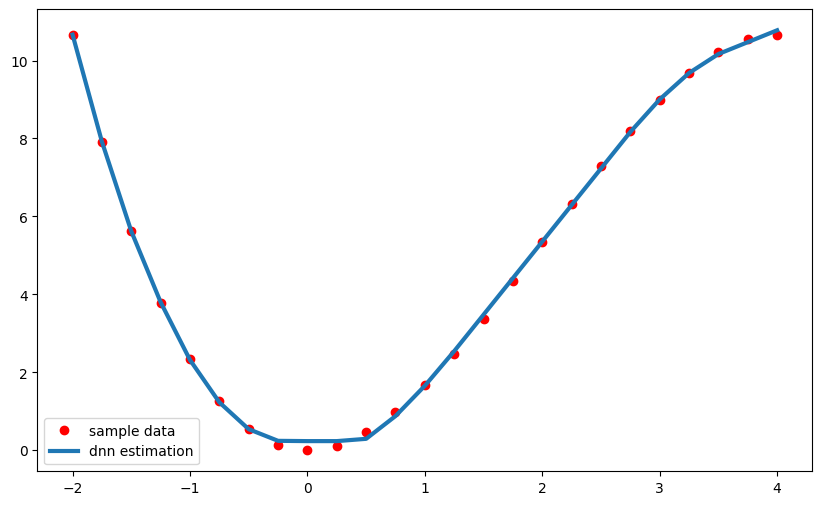

In [76]:
plt.figure(figsize = (10, 6))
plt.plot(x, y, 'ro', label = 'sample data')
plt.plot(x, y_, lw =3.0, label = 'dnn estimation')
plt.legend()